In [15]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import numpy as np

np.random.seed(0)

from IPython.display import Markdown, display
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [3]:
# Read CSV and preprocess data
adult_data = pd.read_csv('census_income/adult.data.csv', na_values='?').dropna()

# Initialize the encoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in adult_data.columns:
    if adult_data[column].dtype == 'object':
        adult_data[column] = le.fit_transform(adult_data[column])

adult_data.to_csv("census_income/adult.data.encoded.csv")

In [14]:
country_counts = adult_data['native-country'].value_counts()

fig = px.bar(country_counts,
             x=country_counts.index,
             y=country_counts.values,
             labels={'x':'Country', 'y':'Count'},
             title='Country Counts')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


In [16]:
# Create BinaryLabelDatasets for the training set
dataset_nc = BinaryLabelDataset(df=adult_data,
                                label_names=['income-class'],
                                protected_attribute_names=['native-country'],
                                favorable_label=1, unfavorable_label=0)

privileged_group = [{'native-country': 38}]
stat_parity_arr = []

for other_country in adult_data['native-country'].unique():
    if other_country != 38:
        unprivileged_group = [{'native-country': other_country}]
        metric = BinaryLabelDatasetMetric(dataset_nc, unprivileged_groups=unprivileged_group,
                                          privileged_groups=privileged_group)
        stat_parity_arr.append(metric.statistical_parity_difference())

countries = sorted([country for country in adult_data['native-country'].unique() if country != 38])

# Sort dis_impact_arr based on sorted countries
dis_impact_arr_sorted = [x for _, x in sorted(zip(countries, stat_parity_arr))]

fig = go.Figure(data=[
    go.Bar(x=countries, y=dis_impact_arr_sorted)
])

fig.update_layout(
    title='Statistical Parity for Each Country',
    xaxis=dict(
        title='Country',
        tickangle=90
    ),
    yaxis=dict(
        title='Statistical Parity'
    ),
    autosize=False,
    width=1000,
    height=600
)

fig.show()

Fairness metrics for the training set:


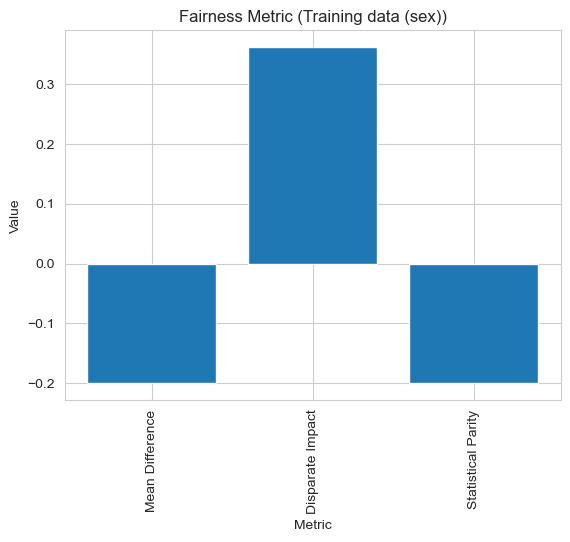

In [7]:
dataset = BinaryLabelDataset(df=adult_data,
                             label_names=['income-class'],
                             protected_attribute_names=['sex'],
                             favorable_label=1, unfavorable_label=0)

metric_dataset = BinaryLabelDatasetMetric(dataset,
                                          unprivileged_groups=[{'sex': 0}],
                                          privileged_groups=[{'sex': 1}])

print("Fairness metrics for the training set:")
# Compute the metrics
mean_diff_dataset = metric_dataset.mean_difference()
disp_impact_dataset = metric_dataset.disparate_impact()
parity_dataset = metric_dataset.statistical_parity_difference()

# Create a dictionary of metrics
metrics_dataset = {'Mean Difference': mean_diff_dataset, 'Disparate Impact': disp_impact_dataset,
                   'Statistical Parity': parity_dataset}

# Create a bar plot
plt.bar(metrics_dataset.keys(), metrics_dataset.values())
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Fairness Metric (Training data (sex))')
plt.xticks(rotation=90)
plt.show()

In [8]:
# ~ Take features of data, training and testing data
# Separate features and target
X = adult_data.iloc[:, :-1]  # All columns except the last one
y = adult_data.iloc[:, -1]  # The last column (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cpy = X_train.copy()
X_test_cpy = X_test.copy()

Fairness metrics for the training set:


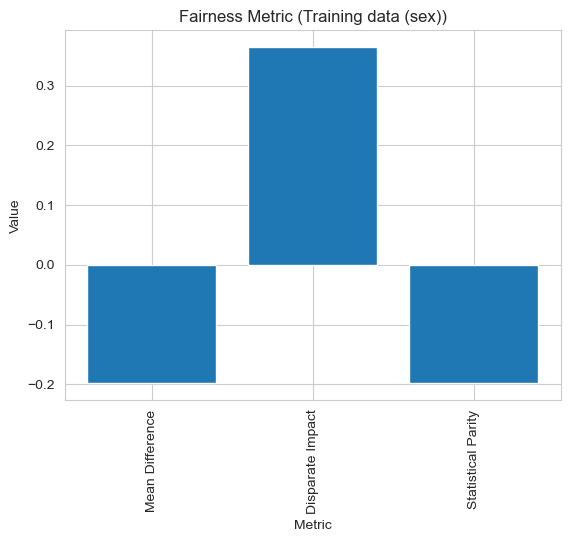

In [10]:
# Create BinaryLabelDatasets for the training set
dataset_train = BinaryLabelDataset(df=pd.concat((X_train_cpy, y_train), axis=1),
                                   label_names=['income-class'],
                                   protected_attribute_names=['sex'],
                                   favorable_label=1, unfavorable_label=0)

# Compute the fairness metrics for the training set
metric_train = BinaryLabelDatasetMetric(dataset_train,
                                        unprivileged_groups=[{'sex': 0}],
                                        privileged_groups=[{'sex': 1}])

print("Fairness metrics for the training set:")
# Compute the metrics
mean_diff_train = metric_train.mean_difference()
disp_impact_train = metric_train.disparate_impact()
parity_train = metric_train.statistical_parity_difference()

# Create a dictionary of metrics
metrics_train = {'Mean Difference': mean_diff_train, 'Disparate Impact': disp_impact_train,
                 'Statistical Parity': parity_train}

# Create a bar plot
plt.bar(metrics_train.keys(), metrics_train.values())
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Fairness Metric (Training data (sex))')
plt.xticks(rotation=90)
plt.show()

Fairness metrics for the testing set:


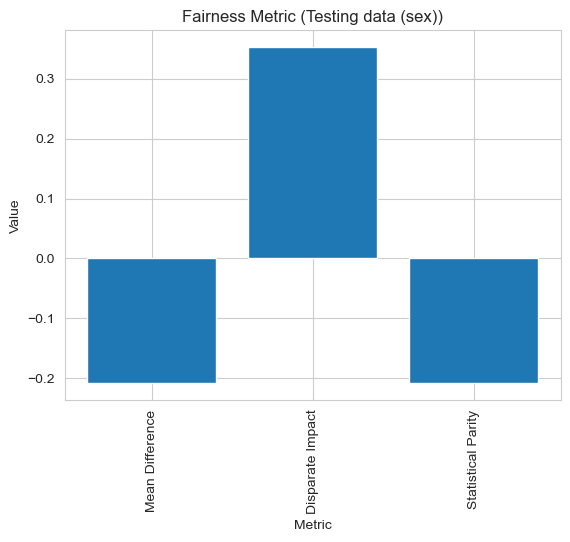

In [11]:
# Create BinaryLabelDatasets for the testing set
dataset_test = BinaryLabelDataset(df=pd.concat((X_test_cpy, y_test), axis=1),
                                  label_names=['income-class'],
                                  protected_attribute_names=['sex'],
                                  favorable_label=1, unfavorable_label=0)

# Compute the fairness metrics for the training set
metric_test = BinaryLabelDatasetMetric(dataset_test,
                                       unprivileged_groups=[{'sex': 0}],
                                       privileged_groups=[{'sex': 1}])

print("Fairness metrics for the testing set:")
# Compute the metrics
mean_diff_test = metric_test.mean_difference()
disp_impact_test = metric_test.disparate_impact()
parity_test = metric_test.statistical_parity_difference()

# Create a dictionary of metrics
metrics_test = {'Mean Difference': mean_diff_test, 'Disparate Impact': disp_impact_test,
                'Statistical Parity': parity_test}

# Create a bar plot
plt.bar(metrics_test.keys(), metrics_test.values())
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Fairness Metric (Testing data (sex))')
plt.xticks(rotation=90)
plt.show()

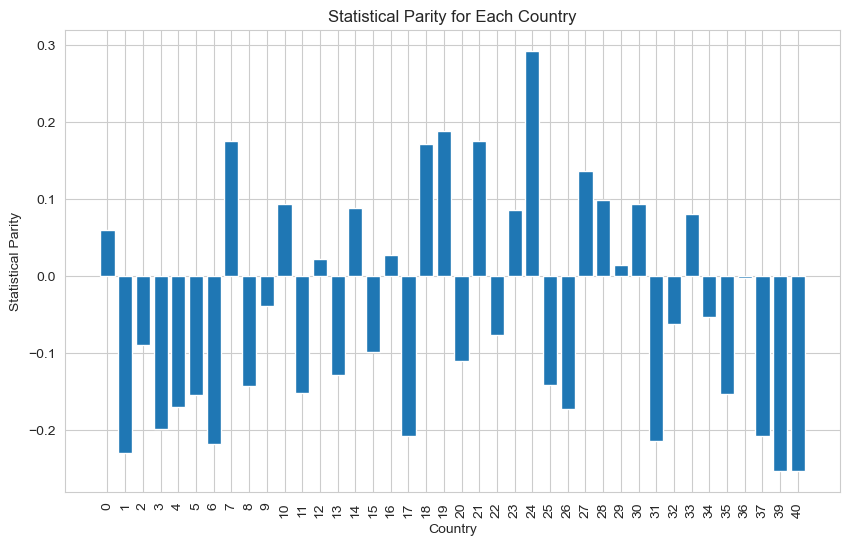

In [12]:
# Create BinaryLabelDatasets for the training set
dataset_nc = BinaryLabelDataset(df=pd.concat((X_train_cpy, y_train), axis=1),
                                label_names=['income-class'],
                                protected_attribute_names=['native-country'],
                                favorable_label=1, unfavorable_label=0)

privileged_group = [{'native-country': 38}]
stat_parity_arr = []

for other_country in X_train_cpy['native-country'].unique():
    if other_country != 38:
        unprivileged_group = [{'native-country': other_country}]
        metric = BinaryLabelDatasetMetric(dataset_nc, unprivileged_groups=unprivileged_group,
                                          privileged_groups=privileged_group)
        stat_parity_arr.append(metric.statistical_parity_difference())

countries = sorted([country for country in X_train_cpy['native-country'].unique() if country != 38])

# Sort dis_impact_arr based on sorted countries
dis_impact_arr_sorted = [x for _, x in sorted(zip(countries, stat_parity_arr))]

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(countries)), dis_impact_arr_sorted)
plt.xticks(np.arange(len(countries)), countries, rotation=90)
plt.title('Statistical Parity for Each Country')
plt.xlabel('Country')
plt.ylabel('Statistical Parity')
plt.show()

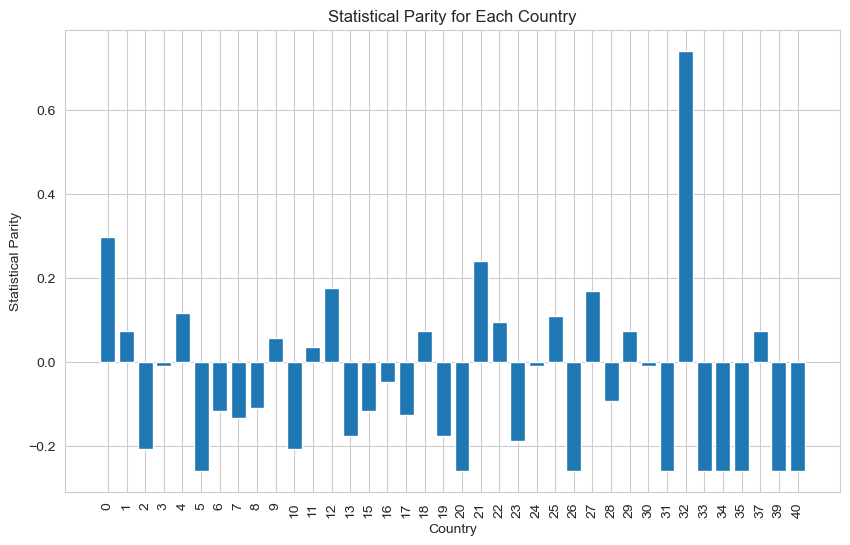

In [13]:
# Create BinaryLabelDatasets for the training set
dataset_nc = BinaryLabelDataset(df=pd.concat((X_test_cpy, y_test), axis=1),
                                label_names=['income-class'],
                                protected_attribute_names=['native-country'],
                                favorable_label=1, unfavorable_label=0)

privileged_group = [{'native-country': 38}]
stat_parity_arr = []

for other_country in X_test_cpy['native-country'].unique():
    if other_country != 38:
        unprivileged_group = [{'native-country': other_country}]
        metric = BinaryLabelDatasetMetric(dataset_nc, unprivileged_groups=unprivileged_group,
                                          privileged_groups=privileged_group)
        stat_parity_arr.append(metric.statistical_parity_difference())

countries = sorted([country for country in X_test_cpy['native-country'].unique() if country != 38])

# Sort dis_impact_arr based on sorted countries
dis_impact_arr_sorted = [x for _, x in sorted(zip(countries, stat_parity_arr))]

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(countries)), dis_impact_arr_sorted)
plt.xticks(np.arange(len(countries)), countries, rotation=90)
plt.title('Statistical Parity for Each Country')
plt.xlabel('Country')
plt.ylabel('Statistical Parity')
plt.show()

In [14]:
# Drop the protected attributes columns
# X_train = X_train.drop(columns=['native-country', 'sex'])
# X_test = X_test.drop(columns=['native-country', 'sex'])

# Standardize the features (optional but can be beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=11, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Epoch 1/11
679/679 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8261 - val_loss: 0.3384 - val_accuracy: 0.8338
Epoch 2/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8429 - val_loss: 0.3357 - val_accuracy: 0.8342
Epoch 3/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8451 - val_loss: 0.3355 - val_accuracy: 0.8346
Epoch 4/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8458 - val_loss: 0.3336 - val_accuracy: 0.8355
Epoch 5/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8474 - val_loss: 0.3312 - val_accuracy: 0.8388
Epoch 6/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8479 - val_loss: 0.3321 - val_accuracy: 0.8400
Epoch 7/11
679/679 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8487 - val_loss: 0.3334 - val_accuracy: 0.8326
Epoch 

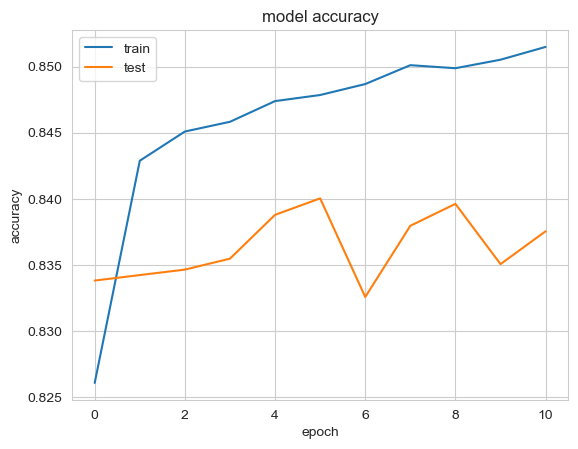

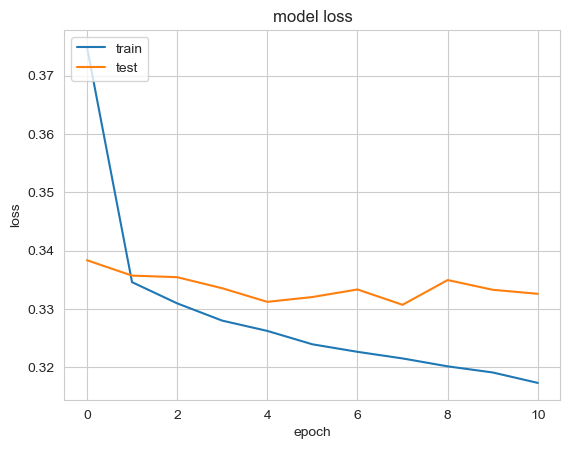

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Convert the original test set
dataset_orig_test = BinaryLabelDataset(df=pd.concat([X_test_cpy, y_test], axis=1),
                                       label_names=['income-class'],
                                       protected_attribute_names=['sex'],
                                       favorable_label=1, unfavorable_label=0)

# Convert the predictions
df_pred = X_test_cpy.copy()
df_pred['income-class'] = y_pred
dataset_pred = BinaryLabelDataset(df=df_pred,
                                  label_names=['income-class'],
                                  protected_attribute_names=['sex'],
                                  favorable_label=1, unfavorable_label=0)

# Now you can create the ClassificationMetric
metric = ClassificationMetric(dataset_orig_test, dataset_pred,
                              unprivileged_groups=[{'sex': 0}],
                              privileged_groups=[{'sex': 1}])

# Now you can use the metric to get fairness measures. For example:
print(f"Disparate Impact: {metric.disparate_impact()}")
print(f"Equal Opportunity Difference: {metric.equal_opportunity_difference()}")


Disparate Impact: 0.2821644068913185
Equal Opportunity Difference: -0.1011653855690553


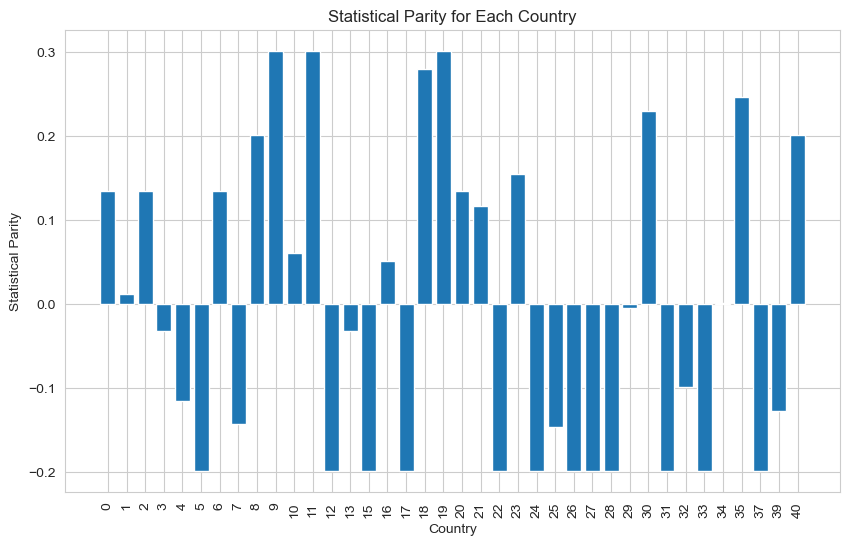

In [22]:
# Create BinaryLabelDatasets for the training set
xy_test = pd.concat((X_test_cpy, y_test), axis=1)
dataset_orig_nc_test = BinaryLabelDataset(df=xy_test,
                                          label_names=['income-class'],
                                          protected_attribute_names=['native-country'],
                                          favorable_label=1, unfavorable_label=0)

privileged_group = [{'native-country': 38}]
stat_parity_arr = []
countries = []

for other_country in xy_test['native-country'].unique():
    if other_country != 38:
        unprivileged_group = [{'native-country': other_country}]

        # Convert the predictions
        df_pred = X_test_cpy.copy()
        df_pred['income-class'] = y_pred
        dataset_pred = BinaryLabelDataset(df=df_pred,
                                          label_names=['income-class'],
                                          protected_attribute_names=['native-country'],
                                          favorable_label=1, unfavorable_label=0)

        # Now you can create the ClassificationMetric
        metric = ClassificationMetric(dataset_orig_nc_test, dataset_pred,
                                      unprivileged_groups=unprivileged_group,
                                      privileged_groups=privileged_group)

        stat_parity_arr.append(metric.statistical_parity_difference())
        countries.append(other_country)

# Sort dis_impact_arr based on sorted countries
dis_impact_arr_sorted = [x for _, x in sorted(zip(countries, stat_parity_arr))]

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(countries)), dis_impact_arr_sorted)
plt.xticks(np.arange(len(countries)), sorted(countries), rotation=90)
plt.title('Statistical Parity for Each Country')
plt.xlabel('Country')
plt.ylabel('Statistical Parity')
plt.show()